
# Plotting the transfer function of a SQUID

## Laurent @IRAP

----

* Created 30/09/2021

This Notebook plots the characteristic of a SQUID.

----


In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def dicotom(func, y, x1, x2, deltamax=1e-14, nitermax=1000):
    if ( func(x1) > y and func(x2) > y ) or ( func(x1) < y and func(x2) < y ):
        print('Erreur ! Mauvaise gamme de départ.')
        print(y, x1, x2)
        return(0)
    else:
        niter=0
        delta=abs(y-func(x1))
        print(">>>> ", niter, delta)
        while (niter < nitermax and delta > deltamax):
            x3 = (x1+x2)/2
            y3, y1, y2=func(x3), func(x1), func(x2)
            if y1 < y and y < y3:
                x2 = x3
            else :
                x1 = x3
            niter+=1
            delta=y-func(x1)
        return(y, x1, func(x1), delta, niter)

In [87]:
a=np.array([2.40329e-06, 9.54011e-06])
p=np.array([6.299441, -0.94834025, 0.39483974])

def MUX_SQUID(x):
    return (a[0]*np.sin(p[0]*(x+p[1])+p[2]*np.sin(p[0]*(x+p[1])))+a[1])*1e6

print(MUX_SQUID(0), MUX_SQUID(0.997419502))

10.540463198154983 10.540463191896608


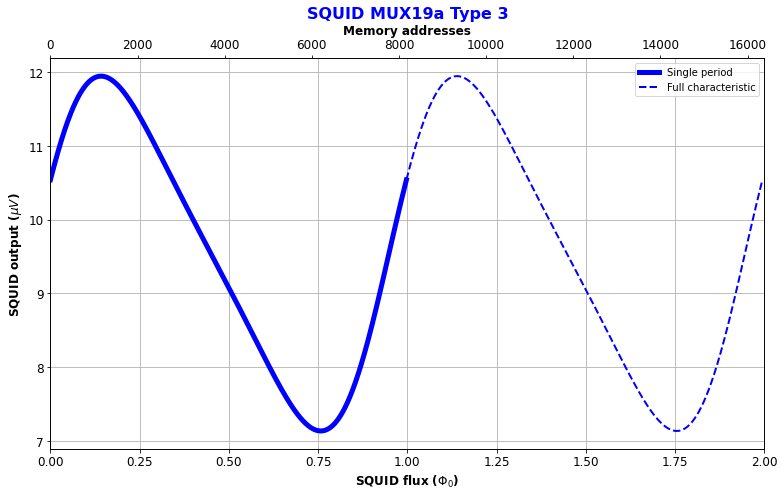

In [90]:
npts=2**13
x=np.arange(npts)*period/npts

## Doing plot
fig=plt.figure(figsize=(11,7))

ax1=fig.add_subplot(1,1,1)

ax1.plot(x, MUX_SQUID(x), color='b', linewidth=5, label='Single period')
ax1.plot(x+period, MUX_SQUID(x),'--', color='b', linewidth=2, label='Full characteristic')
ax1.set_xlabel('SQUID flux ($\Phi_0$)')
ax1.set_ylabel('SQUID output ($\mu V$)')
ax1.set_xlim(0,2)
ax1.set_title("SQUID MUX19a Type 3", color='blue')
ax2 = ax1.twiny()
ax2.set_xlim(0, 2**14)
ax2.set_xlabel("Memory addresses")
ax1.legend(loc='best')
ax1.title.set_weight('bold')
ax1.title.set_fontsize(16)
for item in ([ax1.xaxis.label, ax1.yaxis.label, ax2.xaxis.label]):
    item.set_weight('bold')
    item.set_fontsize(12)
for item in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels()):
    item.set_fontsize(12)
ax1.grid()
fig.tight_layout()

plt.savefig('mux_squid.png', dpi=300, bbox_inches='tight')


In [89]:
# printing to a file
def to_int(x, max_x, nbits):
    return(int(2**nbits * x / max_x))

nom_fichier = "mux_squid.txt"
f = open(nom_fichier, 'w')
for iline in range(len(x)):
    line = "{0:5d}\n".format(to_int(MUX_SQUID(x[iline]), 12, 14))
    f.write(line)
f.close()